In [1]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.scale = 2

pio.renderers.default = "png"


In [2]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'png'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [3]:
import gensim.downloader as api

from wefe.datasets import load_weat
from wefe.metrics import WEAT
from wefe.query import Query
from wefe.word_embedding_model import WordEmbeddingModel

twitter_25 = api.load("glove-twitter-25")
# WordEmbeddingModel receives as first argument a KeyedVectors model
# and the second argument the model name.
model = WordEmbeddingModel(twitter_25, "glove twitter dim=25")

In [4]:
gender_query = Query(
    target_sets=[
        ["female", "woman", "girl", "sister", "she", "her", "hers", "daughter"],
        ["male", "man", "boy", "brother", "he", "him", "his", "son"],
    ],
    attribute_sets=[
        [
            "home",
            "parents",
            "children",
            "family",
            "cousins",
            "marriage",
            "wedding",
            "relatives",
        ],
        [
            "executive",
            "management",
            "professional",
            "corporation",
            "salary",
            "office",
            "business",
            "career",
        ],
    ],
    target_sets_names=["Female terms", "Male Terms"],
    attribute_sets_names=["Family", "Careers"],
)

gender_query


<Query: Female terms and Male Terms wrt Family and Careers
- Target sets: [['female', 'woman', 'girl', 'sister', 'she', 'her', 'hers', 'daughter'], ['male', 'man', 'boy', 'brother', 'he', 'him', 'his', 'son']]
- Attribute sets:[['home', 'parents', 'children', 'family', 'cousins', 'marriage', 'wedding', 'relatives'], ['executive', 'management', 'professional', 'corporation', 'salary', 'office', 'business', 'career']]>

In [5]:
metric = WEAT()
result = metric.run_query(gender_query, model)
result


{'query_name': 'Female terms and Male Terms wrt Family and Careers',
 'result': 0.31658412935212255,
 'weat': 0.31658412935212255,
 'effect_size': 0.6779439085309583,
 'p_value': nan}

In [6]:
weat = WEAT()
result = weat.run_query(gender_query, model, return_effect_size=True)
result


{'query_name': 'Female terms and Male Terms wrt Family and Careers',
 'result': 0.6779439085309583,
 'weat': 0.31658412935212255,
 'effect_size': 0.6779439085309583,
 'p_value': nan}

In [7]:
weat = WEAT()
result = weat.run_query(
    gender_query, model, calculate_p_value=True, p_value_iterations=5000
)
result

{'query_name': 'Female terms and Male Terms wrt Family and Careers',
 'result': 0.31658412935212255,
 'weat': 0.31658412935212255,
 'effect_size': 0.6779439085309583,
 'p_value': 0.08418316336732654}

In [8]:
# load the weat word sets.
word_sets = load_weat()

# print a set of european american common names.
print(word_sets["european_american_names_5"])

['Adam', 'Harry', 'Josh', 'Roger', 'Alan', 'Frank', 'Justin', 'Ryan', 'Andrew', 'Jack', 'Matthew', 'Stephen', 'Brad', 'Greg', 'Paul', 'Jonathan', 'Peter', 'Amanda', 'Courtney', 'Heather', 'Melanie', 'Sara', 'Amber', 'Katie', 'Betsy', 'Kristin', 'Nancy', 'Stephanie', 'Ellen', 'Lauren', 'Colleen', 'Emily', 'Megan', 'Rachel']


In [9]:
ethnicity_query = Query(
    [word_sets["european_american_names_5"], word_sets["african_american_names_5"]],
    [word_sets["pleasant_5"], word_sets["unpleasant_5"]],
    ["European american names", "African american names"],
    ["Pleasant", "Unpleasant"],
)
result = weat.run_query(ethnicity_query, model, warn_not_found_words=True,)
result


ERROR:root:At least one set of 'European american names and African american names wrt Pleasant and Unpleasant' query has proportionally fewer embeddings than allowed by the lost_vocabulary_threshold parameter (0.2). This query will return np.nan.


{'query_name': 'European american names and African american names wrt Pleasant and Unpleasant',
 'result': nan,
 'weat': nan,
 'effect_size': nan}

In [10]:
weat = WEAT()
result = weat.run_query(
    ethnicity_query,
    model,
    preprocessors=[{"lowercase": True, "strip_accents": True}],
    warn_not_found_words=True,
)
result

{'query_name': 'European american names and African american names wrt Pleasant and Unpleasant',
 'result': 3.7529150679125456,
 'weat': 3.7529150679125456,
 'effect_size': 1.2746819330405683,
 'p_value': nan}

In [11]:
weat = WEAT()
result = weat.run_query(
    ethnicity_query,
    model,
    preprocessors=[
        {},  # empty preprocessor, search for the original words.
        {
            "lowercase": True,
            "strip_accents": True,
        },  # search for lowercase and no accent words.
    ],
    warn_not_found_words=True,
)

result

{'query_name': 'European american names and African american names wrt Pleasant and Unpleasant',
 'result': 3.7529150679125456,
 'weat': 3.7529150679125456,
 'effect_size': 1.2746819330405683,
 'p_value': nan}

In [12]:
weat = WEAT()
result = weat.run_query(
    ethnicity_query,
    model,
    preprocessors=[
        {},  # first step: empty preprocessor, search for the original words.
        {"lowercase": True,},  # second step: search for lowercase.
        {
            "lowercase": True,
            "strip_accents": True,
        },  # third step: search for lowercase and no accent words.
    ],
    warn_not_found_words=True,
)

result

{'query_name': 'European american names and African american names wrt Pleasant and Unpleasant',
 'result': 3.7529150679125456,
 'weat': 3.7529150679125456,
 'effect_size': 1.2746819330405683,
 'p_value': nan}

In [13]:
weat = WEAT()
result = weat.run_query(
    ethnicity_query,
    model,
    preprocessors=[
        {},  # first step: empty preprocessor, search for the original words.
        {"lowercase": True,},  # second step: search for lowercase .
        {"uppercase": True,},  # third step: search for uppercase.
    ],
    strategy="all",
    warn_not_found_words=True,
)

result


{'query_name': 'European american names and African american names wrt Pleasant and Unpleasant',
 'result': 3.7529150679125456,
 'weat': 3.7529150679125456,
 'effect_size': 1.2746819330405683,
 'p_value': nan}

In [14]:
import gensim.downloader as api

from wefe.datasets import load_weat
from wefe.metrics import RNSB, WEAT
from wefe.query import Query
from wefe.utils import run_queries
from wefe.word_embedding_model import WordEmbeddingModel

In [15]:
model_1 = WordEmbeddingModel(api.load("glove-twitter-25"), "glove twitter dim=25")
model_2 = WordEmbeddingModel(api.load("glove-twitter-50"), "glove twitter dim=50")
model_3 = WordEmbeddingModel(api.load("glove-twitter-100"), "glove twitter dim=100")

models = [model_1, model_2, model_3]



In [16]:
# Load the WEAT word sets
word_sets = load_weat()

# Create gender queries
gender_query_1 = Query(
    [word_sets["male_terms"], word_sets["female_terms"]],
    [word_sets["career"], word_sets["family"]],
    ["Male terms", "Female terms"],
    ["Career", "Family"],
)

gender_query_2 = Query(
    [word_sets["male_terms"], word_sets["female_terms"]],
    [word_sets["science"], word_sets["arts"]],
    ["Male terms", "Female terms"],
    ["Science", "Arts"],
)

gender_query_3 = Query(
    [word_sets["male_terms"], word_sets["female_terms"]],
    [word_sets["math"], word_sets["arts_2"]],
    ["Male terms", "Female terms"],
    ["Math", "Arts"],
)

gender_queries = [gender_query_1, gender_query_2, gender_query_3]


In [17]:
WEAT_gender_results = run_queries(
    WEAT, gender_queries, models, queries_set_name="Gender Queries"
)
WEAT_gender_results


ERROR:root:At least one set of 'Male terms and Female terms wrt Science and Arts' query has proportionally fewer embeddings than allowed by the lost_vocabulary_threshold parameter (0.2). This query will return np.nan.
ERROR:root:At least one set of 'Male terms and Female terms wrt Science and Arts' query has proportionally fewer embeddings than allowed by the lost_vocabulary_threshold parameter (0.2). This query will return np.nan.
ERROR:root:At least one set of 'Male terms and Female terms wrt Science and Arts' query has proportionally fewer embeddings than allowed by the lost_vocabulary_threshold parameter (0.2). This query will return np.nan.


query_name,Male terms and Female terms wrt Career and Family,Male terms and Female terms wrt Science and Arts,Male terms and Female terms wrt Math and Arts
model_name,,,
glove twitter dim=25,0.316584,NaN,-0.022133
glove twitter dim=50,0.363743,NaN,-0.272334
glove twitter dim=100,0.385352,NaN,-0.082544


In [18]:
WEAT_gender_results = run_queries(
    WEAT,
    gender_queries,
    models,
    metric_params={"preprocessors": [{"lowercase": True}]},
    queries_set_name="Gender Queries",
)

WEAT_gender_results

query_name,Male terms and Female terms wrt Career and Family,Male terms and Female terms wrt Science and Arts,Male terms and Female terms wrt Math and Arts
model_name,,,
glove twitter dim=25,0.316584,0.167431,-0.033912
glove twitter dim=50,0.363743,-0.084690,-0.307589
glove twitter dim=100,0.385352,0.099632,-0.155790


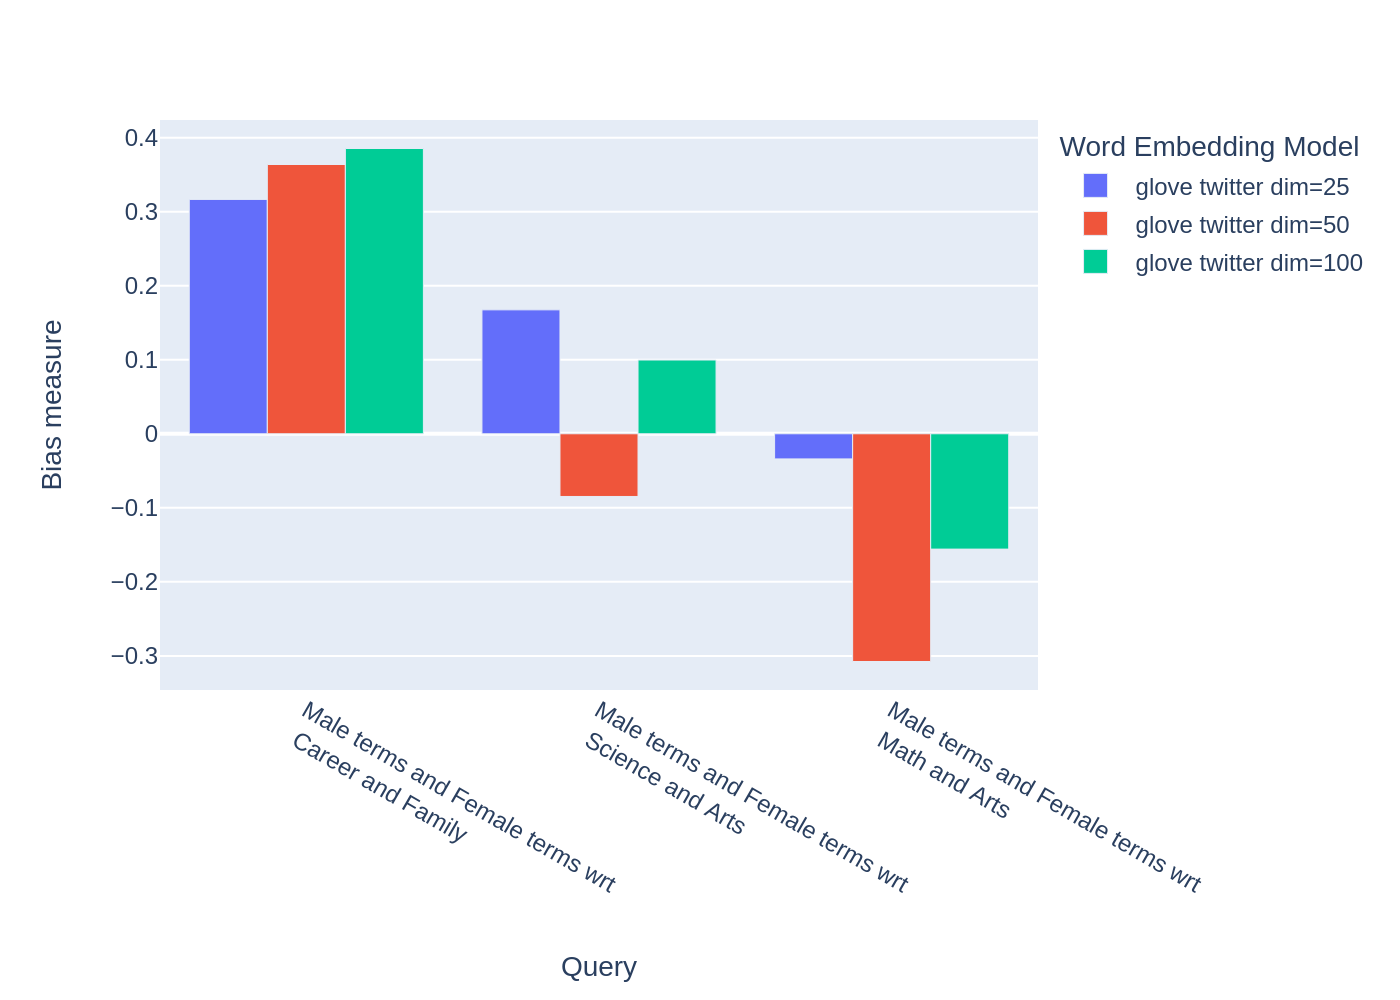

In [19]:
from wefe.utils import plot_queries_results, run_queries

# Plot the results
plot_queries_results(WEAT_gender_results).show()


In [20]:
WEAT_gender_results_agg = run_queries(
    WEAT,
    gender_queries,
    models,
    metric_params={"preprocessors": [{"lowercase": True}]},
    aggregate_results=True,
    aggregation_function="abs_avg",
    queries_set_name="Gender Queries",
)
WEAT_gender_results_agg


,Male terms and Female terms wrt Career and Family,Male terms and Female terms wrt Science and Arts,Male terms and Female terms wrt Math and Arts,WEAT: Gender Queries average of abs values score
model_name,,,,
glove twitter dim=25,0.316584,0.167431,-0.033912,0.172642
glove twitter dim=50,0.363743,-0.084690,-0.307589,0.252007
glove twitter dim=100,0.385352,0.099632,-0.155790,0.213591


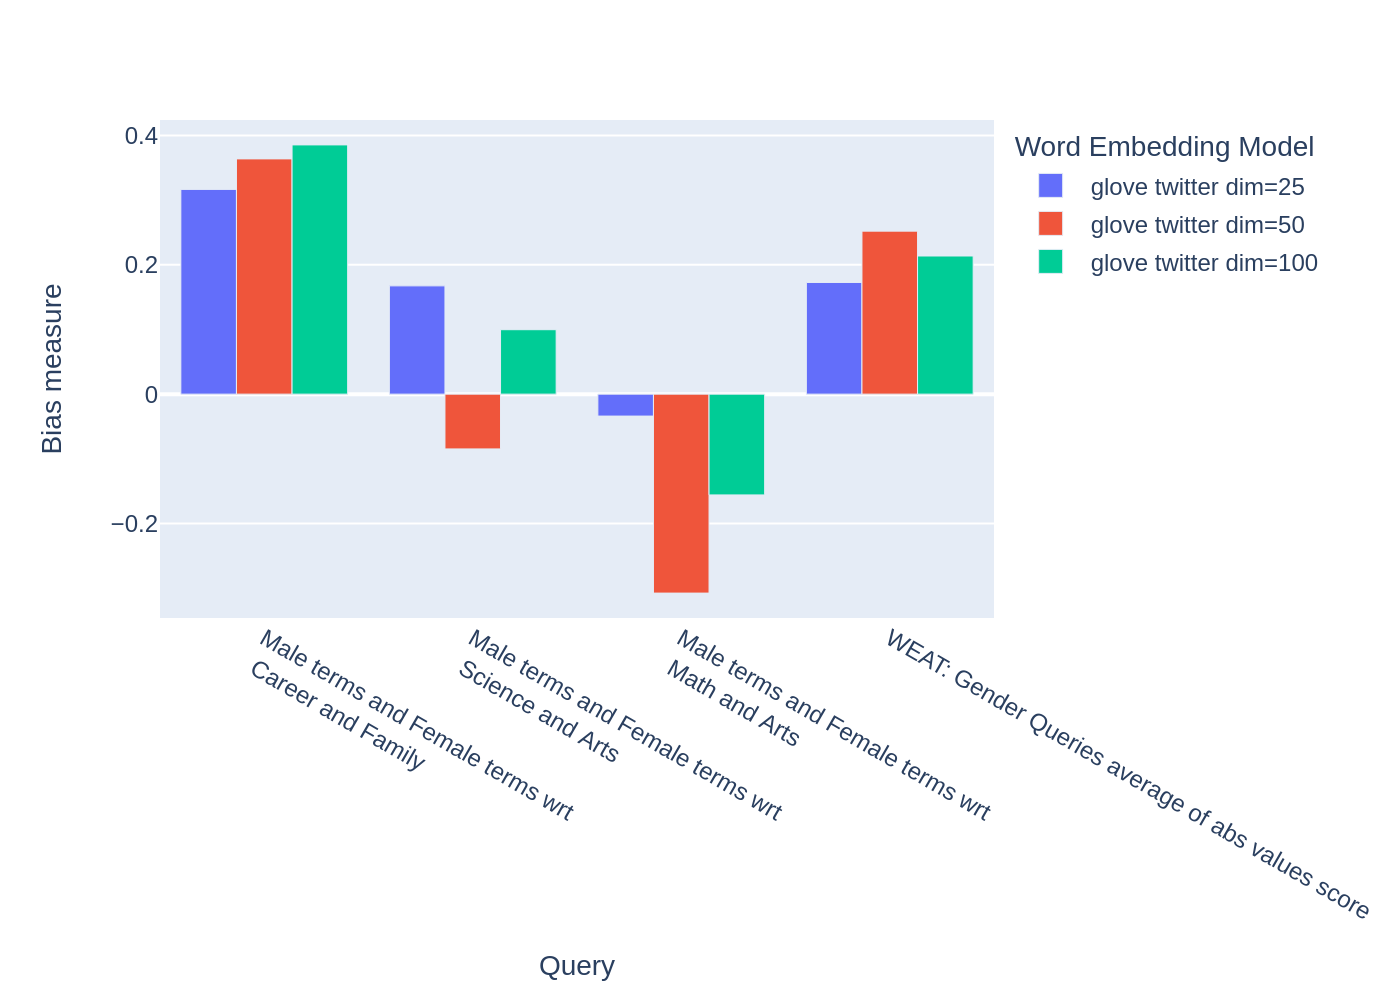

In [21]:
plot_queries_results(WEAT_gender_results_agg).show()


In [22]:
WEAT_gender_results_only_agg = run_queries(
    WEAT,
    gender_queries,
    models,
    metric_params={"preprocessors": [{"lowercase": True}]},
    aggregate_results=True,
    aggregation_function="abs_avg",
    return_only_aggregation=True,
    queries_set_name="Gender Queries",
)
WEAT_gender_results_only_agg


,WEAT: Gender Queries average of abs values score
model_name,
glove twitter dim=25,0.172642
glove twitter dim=50,0.252007
glove twitter dim=100,0.213591


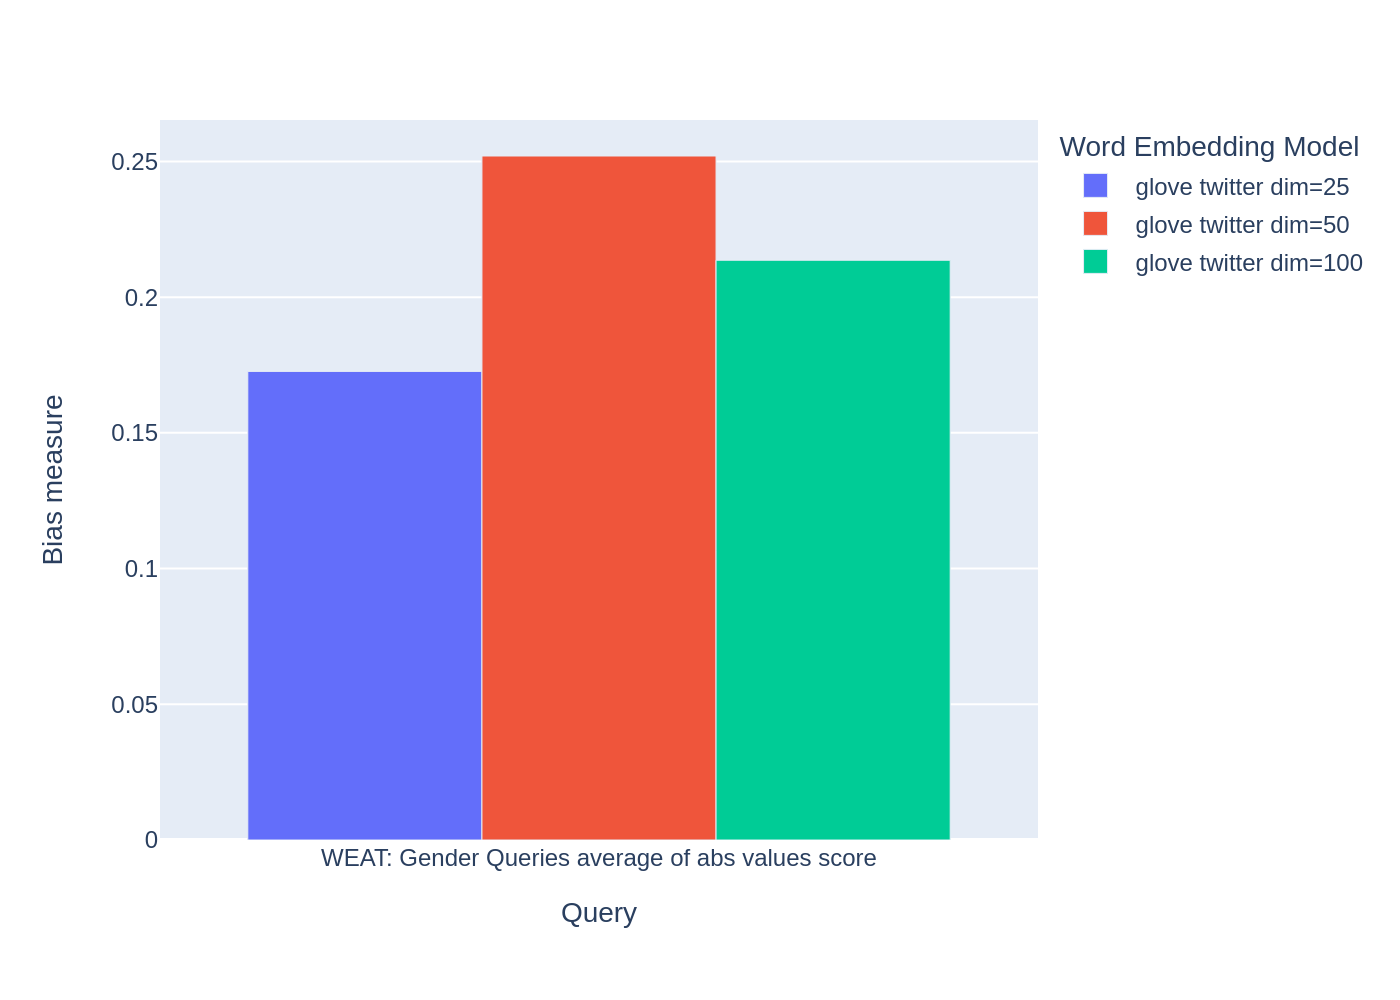

In [23]:
fig = plot_queries_results(WEAT_gender_results_only_agg)
fig.show()


| model_name                             |           WEAT: Gender Queries average of abs values score              |           WEAT: Ethnicity Queries average of abs values score          |
|----------------------------------------|-------------------------------------------------------------------------|------------------------------------------------------------------------|
|           glove twitter dim=25         |                                     0.210556                            |                                     2.64632                            |
|           glove twitter dim=50         |                                     0.292373                            |                                     1.87431                            |
|           glove twitter dim=100        |                                     0.225116                            |                                     1.78469                            |

| model_name                             |           WEAT: Gender Queries average of abs values score              |           RNSB: Gender Queries average of abs values score              |
|----------------------------------------|-------------------------------------------------------------------------|-------------------------------------------------------------------------|
|           glove twitter dim=25         |                                     0.210556                            |                                     0.032673                            |
|           glove twitter dim=50         |                                     0.292373                            |                                     0.049429                            |
|           glove twitter dim=100        |                                     0.225116                            |                                     0.0312772                           |

In [24]:
# define the queries
gender_query_1 = Query(
    [word_sets["male_terms"], word_sets["female_terms"]],
    [word_sets["career"], word_sets["family"]],
    ["Male terms", "Female terms"],
    ["Career", "Family"],
)
gender_query_2 = Query(
    [word_sets["male_terms"], word_sets["female_terms"]],
    [word_sets["science"], word_sets["arts"]],
    ["Male terms", "Female terms"],
    ["Science", "Arts"],
)
gender_query_3 = Query(
    [word_sets["male_terms"], word_sets["female_terms"]],
    [word_sets["math"], word_sets["arts_2"]],
    ["Male terms", "Female terms"],
    ["Math", "Arts"],
)

gender_queries = [gender_query_1, gender_query_2, gender_query_3]

# run the queries using WEAT
WEAT_gender_results = run_queries(
    WEAT,
    gender_queries,
    models,
    metric_params={"preprocessors": [{"lowercase": True}]},
    aggregate_results=True,
    return_only_aggregation=True,
    queries_set_name="Gender Queries",
)

# run the queries using WEAT effect size
WEAT_EZ_gender_results = run_queries(
    WEAT,
    gender_queries,
    models,
    metric_params={"preprocessors": [{"lowercase": True}], "return_effect_size": True,},
    aggregate_results=True,
    return_only_aggregation=True,
    queries_set_name="Gender Queries",
)

# run the queries using RNSB
RNSB_gender_results = run_queries(
    RNSB,
    gender_queries,
    models,
    metric_params={"preprocessors": [{"lowercase": True}]},
    aggregate_results=True,
    return_only_aggregation=True,
    queries_set_name="Gender Queries",
)

In [25]:
from wefe.utils import create_ranking

# create the ranking
gender_ranking = create_ranking(
    [WEAT_gender_results, WEAT_EZ_gender_results, RNSB_gender_results]
)

gender_ranking

,WEAT: Gender Queries average of abs values score (1),WEAT: Gender Queries average of abs values score (2),RNSB: Gender Queries average of abs values score
model_name,,,
glove twitter dim=25,1.0,1.0,3.0
glove twitter dim=50,3.0,2.0,1.0
glove twitter dim=100,2.0,3.0,2.0


In [26]:

# define the queries
ethnicity_query_1 = Query(
    [word_sets["european_american_names_5"], word_sets["african_american_names_5"]],
    [word_sets["pleasant_5"], word_sets["unpleasant_5"]],
    ["European Names", "African Names"],
    ["Pleasant", "Unpleasant"],
)

ethnicity_query_2 = Query(
    [word_sets["european_american_names_7"], word_sets["african_american_names_7"]],
    [word_sets["pleasant_9"], word_sets["unpleasant_9"]],
    ["European Names", "African Names"],
    ["Pleasant 2", "Unpleasant 2"],
)

ethnicity_queries = [ethnicity_query_1, ethnicity_query_2]

# run the queries using WEAT
WEAT_ethnicity_results = run_queries(
    WEAT,
    ethnicity_queries,
    models,
    metric_params={"preprocessors": [{"lowercase": True}]},
    aggregate_results=True,
    return_only_aggregation=True,
    queries_set_name="Ethnicity Queries",
)

# run the queries using WEAT effect size
WEAT_EZ_ethnicity_results = run_queries(
    WEAT,
    ethnicity_queries,
    models,
    metric_params={"preprocessors": [{"lowercase": True}], "return_effect_size": True,},
    aggregate_results=True,
    return_only_aggregation=True,
    queries_set_name="Ethnicity Queries",
)

# run the queries using RNSB
RNSB_ethnicity_results = run_queries(
    RNSB,
    ethnicity_queries,
    models,
    metric_params={"preprocessors": [{"lowercase": True}]},
    aggregate_results=True,
    return_only_aggregation=True,
    queries_set_name="Ethnicity Queries",
)


In [27]:
# create the ranking
ethnicity_ranking = create_ranking(
    [WEAT_ethnicity_results, WEAT_EZ_gender_results, RNSB_ethnicity_results]
)

ethnicity_ranking


,WEAT: Ethnicity Queries average of abs values score,WEAT: Gender Queries average of abs values score,RNSB: Ethnicity Queries average of abs values score
model_name,,,
glove twitter dim=25,3.0,1.0,3.0
glove twitter dim=50,2.0,2.0,2.0
glove twitter dim=100,1.0,3.0,1.0


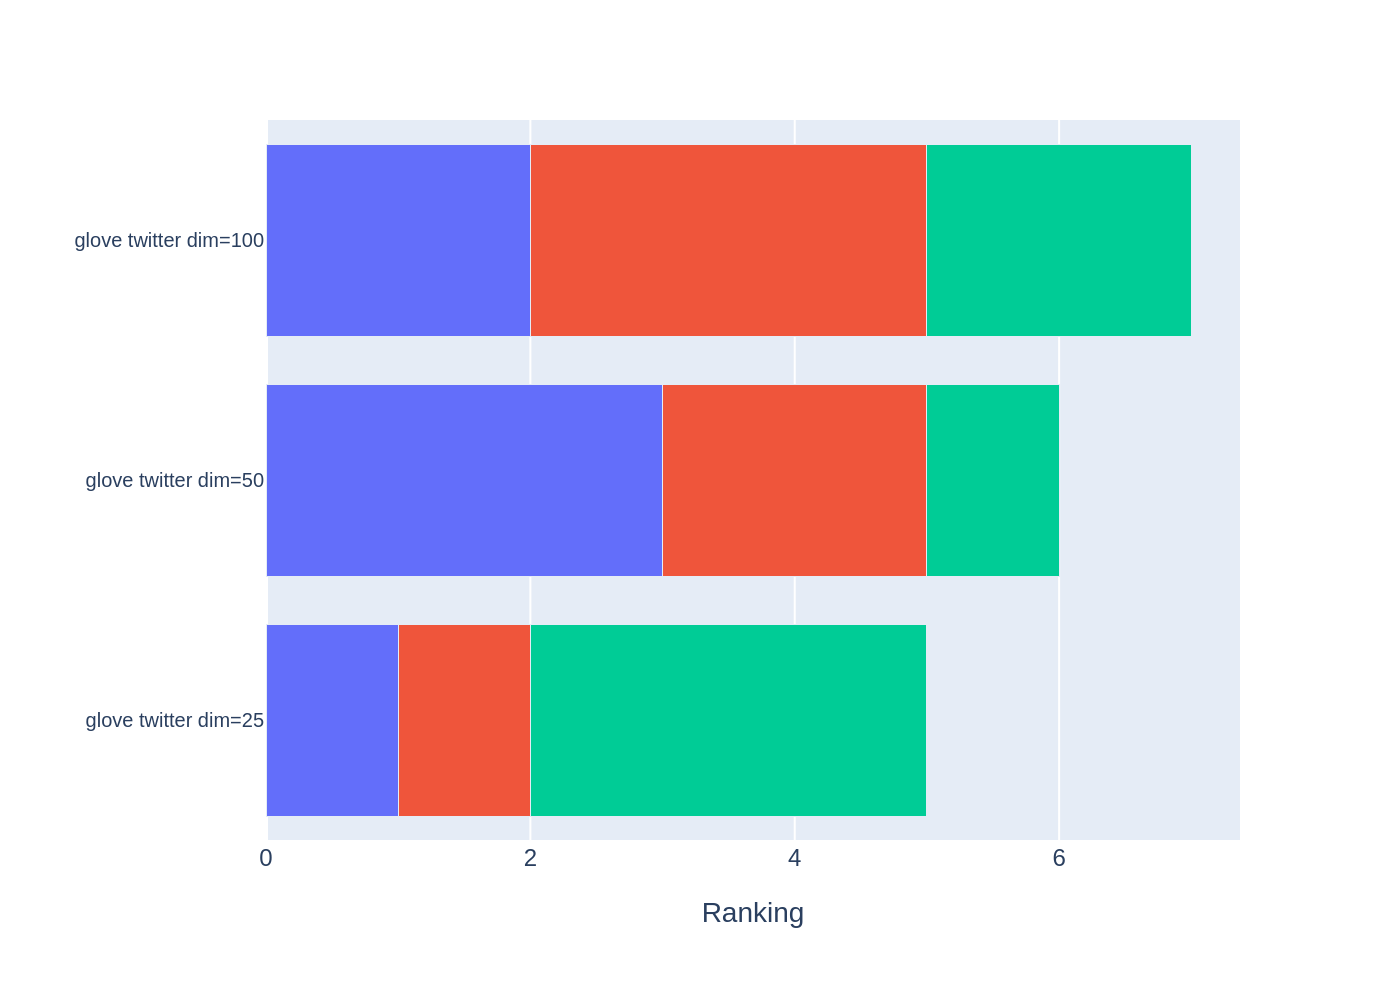

In [28]:
from wefe.utils import plot_ranking

fig = plot_ranking(gender_ranking)
fig.show()

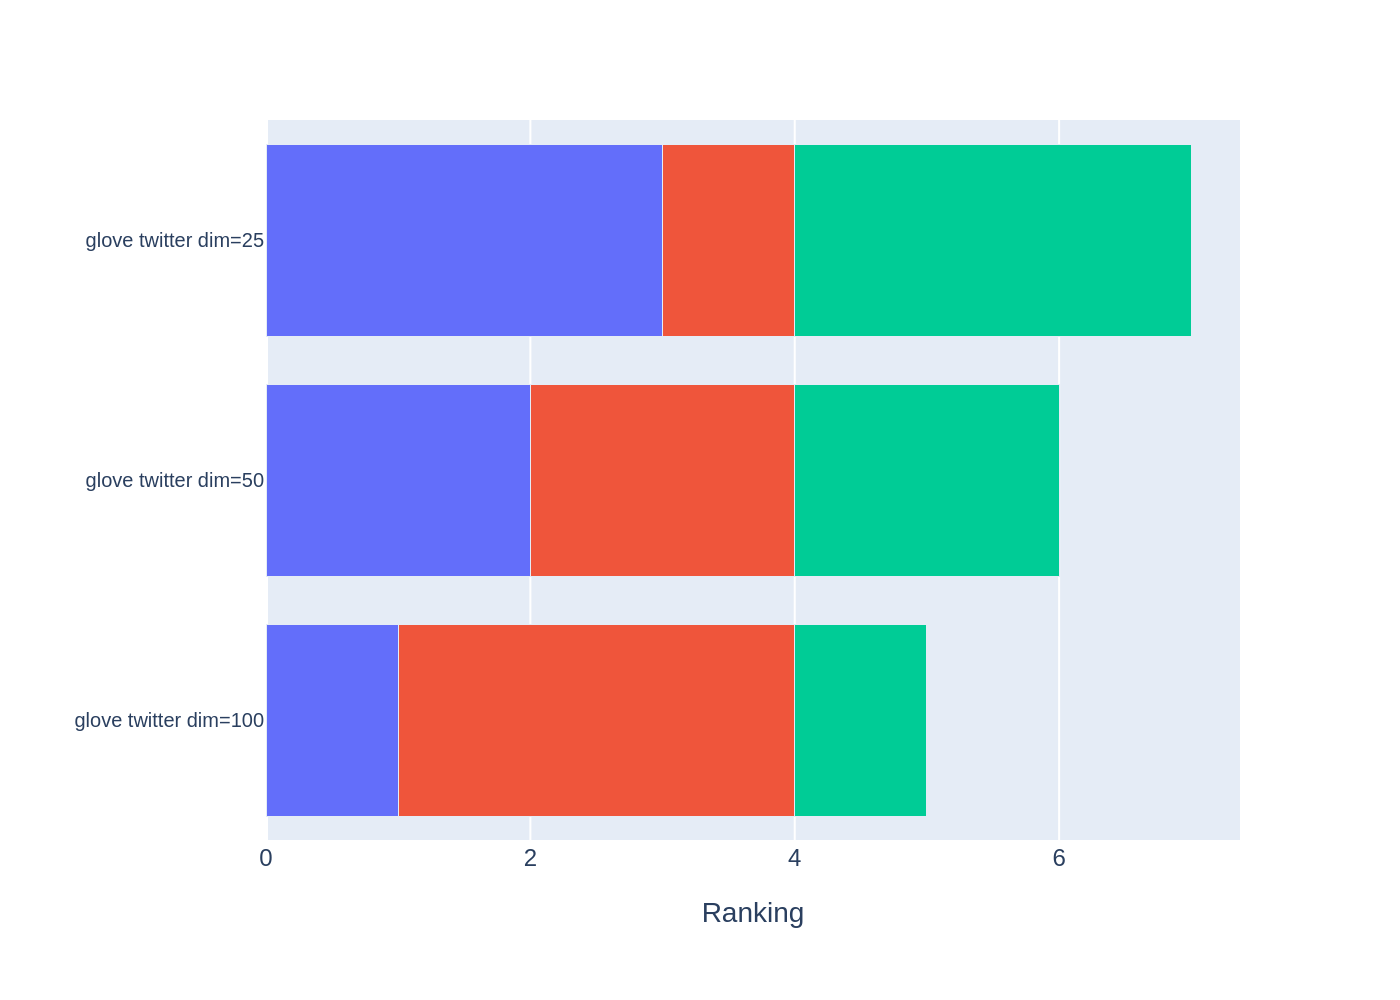

In [29]:
fig = plot_ranking(ethnicity_ranking)
fig.show()

In [30]:
from wefe.utils import calculate_ranking_correlations, plot_ranking_correlations

correlations = calculate_ranking_correlations(gender_ranking)
correlations


,WEAT: Gender Queries average of abs values score (1),WEAT: Gender Queries average of abs values score (2),RNSB: Gender Queries average of abs values score
WEAT: Gender Queries average of abs values score (1),1.0,0.5,-1.0
WEAT: Gender Queries average of abs values score (2),0.5,1.0,-0.5
RNSB: Gender Queries average of abs values score,-1.0,-0.5,1.0


In [31]:
calculate_ranking_correlations(gender_ranking, method="kendall")


,WEAT: Gender Queries average of abs values score (1),WEAT: Gender Queries average of abs values score (2),RNSB: Gender Queries average of abs values score
WEAT: Gender Queries average of abs values score (1),1.000000,0.333333,-1.000000
WEAT: Gender Queries average of abs values score (2),0.333333,1.000000,-0.333333
RNSB: Gender Queries average of abs values score,-1.000000,-0.333333,1.000000


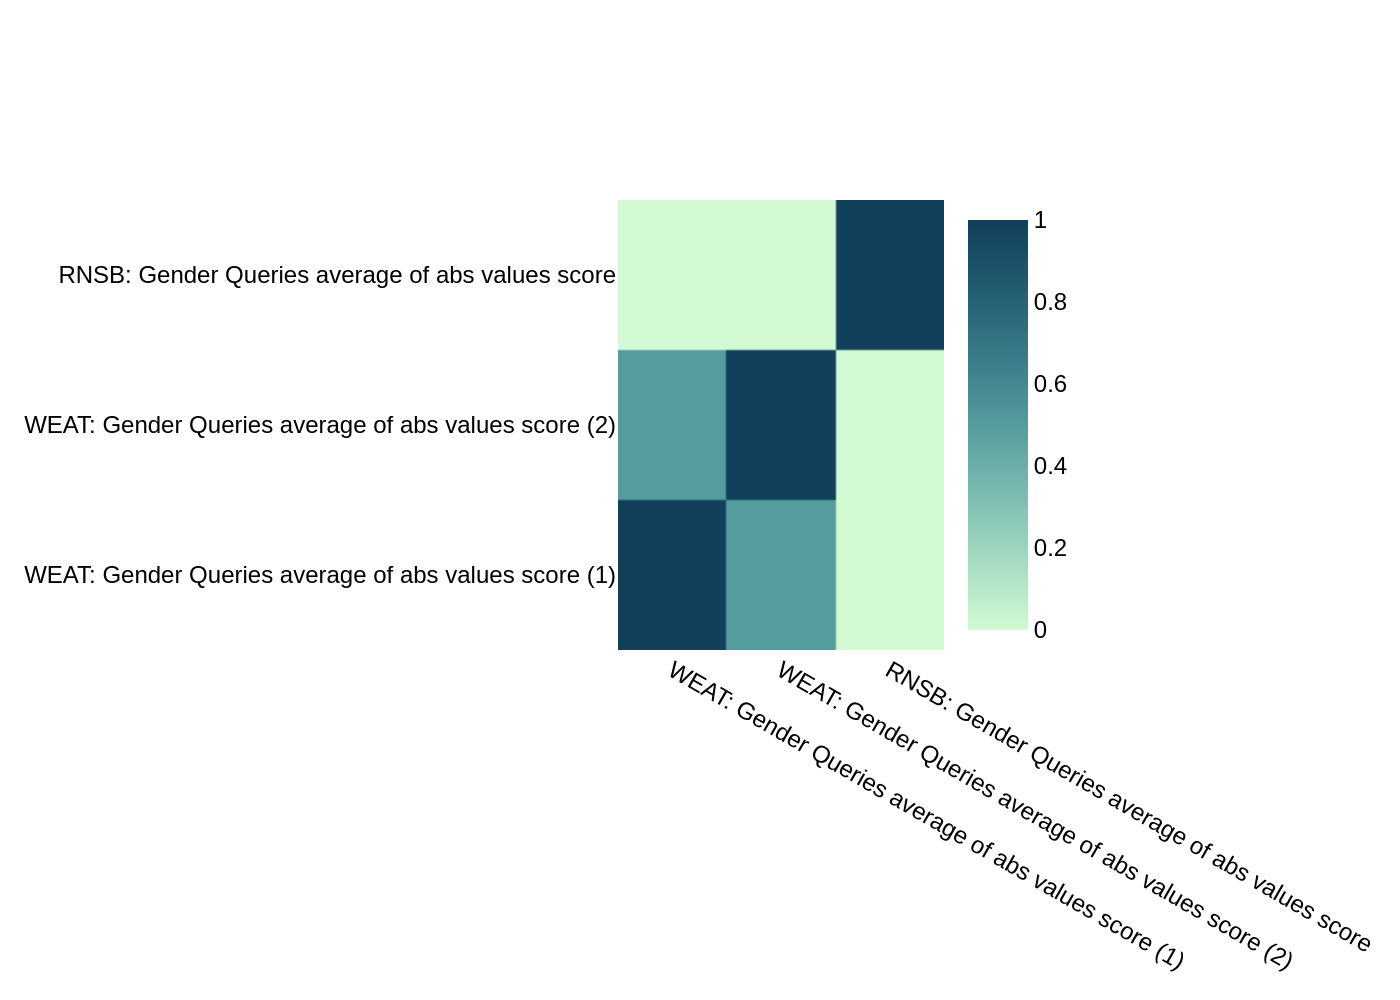

In [32]:
correlation_fig = plot_ranking_correlations(correlations)
correlation_fig.show()
